## 利用Pandas 分析股票資料

### 安裝 pandas datareader
- ! pip install pandas_datareader

In [5]:
#! pip install pandas_datareader -U

### 使用Pandas DataReader 讀取股價資訊

In [79]:
import pandas_datareader
apple = pandas_datareader.get_data_google('AAPL')

C:\ProgramData\Anaconda3\lib\site-packages\pandas_datareader\google\daily.py:40: UnstableAPIWarning: 
The Google Finance API has not been stable since late 2017. Requests seem
to fail at random. Failure is especially common when bulk downloading.

  warnings.warn(UNSTABLE_WARNING, UnstableAPIWarning)


### 使用read_csv 讀取2330.TW股價資料

In [13]:
import pandas
tw2330 = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/tw2330.csv',parse_dates={'Dates':[0]})

In [14]:
tw2330.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 7 columns):
Dates        1232 non-null datetime64[ns]
Open         1232 non-null object
High         1232 non-null object
Low          1232 non-null object
Close        1232 non-null object
Adj Close    1232 non-null object
Volume       1232 non-null object
dtypes: datetime64[ns](1), object(6)
memory usage: 67.5+ KB


In [15]:
tw2330.describe()

,Dates,Open,High,Low,Close,Adj Close,Volume
count,1232,1232,1232,1232,1232,1232,1232
unique,1232,289,284,291,291,415,1200
top,2016-09-08 00:00:00,105.000000,125.000000,103.000000,105.000000,92.682137,null
freq,1,17,18,21,18,18,14
first,2013-03-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,2018-03-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
tw2330.dtypes

Dates        datetime64[ns]
Open                 object
High                 object
Low                  object
Close                object
Adj Close            object
Volume               object
dtype: object

In [17]:
tw2330.dropna(inplace=True)
tw2330 = tw2330[tw2330['Close'] != 'null']

In [18]:
tw2330['Close'] = tw2330['Close'].astype(float)
tw2330['Open'] = tw2330['Open'].astype(float)
tw2330['High'] = tw2330['High'].astype(float)
tw2330['Low'] = tw2330['Low'].astype(float)

In [19]:
tw2330['Close'] .max()
tw2330['Close'] .min()
tw2330['Close'] .mean()
tw2330['Close'] .count()

1218

In [41]:
tw2330.head()

,Dates,Open,High,Low,Close,Adj Close,Volume
0,2013-03-04,104.5,104.5,101.5,102.0,87.578972,50033000
1,2013-03-05,103.5,104.0,102.5,104.0,89.296204,53913000
2,2013-03-06,104.0,104.5,103.0,104.0,89.296204,35977000
3,2013-03-07,103.5,104.0,103.0,103.0,88.437592,20518000
4,2013-03-08,103.0,104.5,102.0,103.5,88.866898,44571000


In [42]:
tw2330.tail()

,Dates,Open,High,Low,Close,Adj Close,Volume
1227,2018-02-23,241.0,245.0,241.0,245.0,245.000000,26985776
1228,2018-02-26,247.0,247.5,245.0,246.5,246.500000,35901810
1229,2018-02-27,250.5,250.5,246.0,246.0,246.000000,40818119
1230,2018-03-01,246.0,246.0,242.0,243.0,243.000000,39719984
1231,2018-03-02,240.0,241.0,238.5,240.0,240.000000,35139170


### 找出資料的中心

In [43]:
tw2330.mean()

Open     152.771429
High     153.886371
Low      151.599015
Close    152.817077
dtype: float64

In [44]:
tw2330['Close'].mean()

152.81707718719213

In [45]:
tw2330.median()

Open     142.00
High     143.50
Low      141.00
Close    142.25
dtype: float64

### 找出資料的離度

In [59]:
a = [0,42,50,60,55,72,58,80,82,87,98]
a.sort()
print(a)
pandas.Series(a).median()
pandas.Series(a).quantile(0.25) # (55 + 50) / 2
pandas.Series(a).quantile(0.75) # (80 + 82) / 2
pandas.Series(a).quantile(0.75) - pandas.Series(a).quantile(0.25)

[0, 42, 50, 55, 58, 60, 72, 80, 82, 87, 98]


28.5

In [60]:
pandas.Series(a).describe()

count    11.000000
mean     62.181818
std      26.835865
min       0.000000
25%      52.500000
50%      60.000000
75%      81.000000
max      98.000000
dtype: float64

In [62]:
sa = pandas.Series(a)
IQR = sa.quantile(0.75) - sa.quantile(0.25)
max(sa.min(), sa.median() - 1.5 * IQR)
min(sa.max(), sa.median() + 1.5 * IQR)


17.25

Populating the interactive namespace from numpy and matplotlib


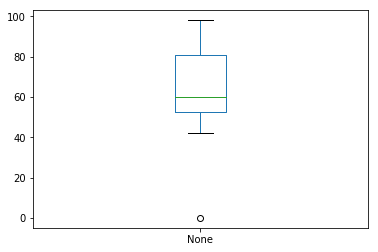

In [63]:
%pylab inline
sa.plot(kind='box')

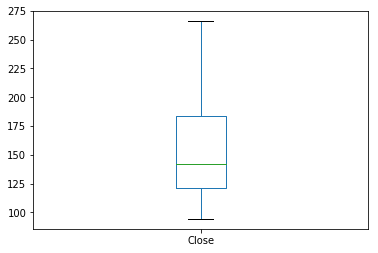

In [65]:
tw2330['Close'].plot(kind= 'box')

In [88]:
import random
temp = pandas.Series([random.randint(0,38) for i in range(1,100)])
print(temp.mean(), temp.median())


19.555555555555557 19.0


In [89]:
temp = temp.append(pandas.Series([999,999,999]) )
print(temp.mean(), temp.median())

48.36274509803921 19.5


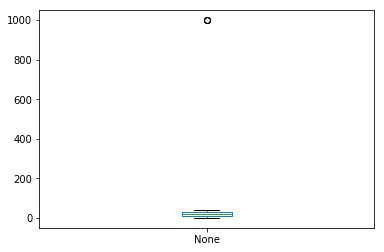

In [90]:
temp.plot(kind= 'box')

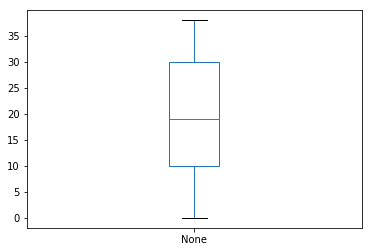

In [91]:
temp[temp < 50].plot(kind= 'box')

### 讀取實價登錄資訊

In [5]:
import pandas
lvr_url = 'https://raw.githubusercontent.com/ywchiu/cathayr/master/data/lvr_prices.csv'
lvr_prices = pandas.read_csv(lvr_url, index_col=0)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
house = lvr_prices[lvr_prices['trading_target'] == '房地(土地+建物)']
house = house[(house['area'] == '大安區') | (house['area'] =='中山區')]

In [7]:
house = house[['area', 'total_price']]
daan = house[house['area'] == '大安區']
zhongshan = house[house['area'] == '中山區']

### 增加Matplotlib 中文字型
- C:\ProgramData\Anaconda3\Lib\site-packages\matplotlib\mpl-data
- 修改 matplotlibrc
- 將 line 199 font.family         : sans-serif 前面的註解拿掉
- 將 line 211 font.sans-serif 前面的註解拿掉
- 增加 Microsoft YaHei
- 變成 font.sans-serif     : Microsoft YaHei,

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


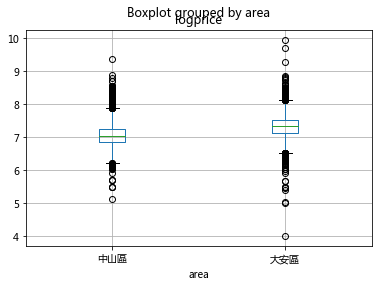

In [8]:
%pylab inline
import numpy as np
house['logprice'] = np.log10(house['total_price']) 
house.boxplot(column='logprice',by='area')

### 繪製直方圖

In [9]:
import random
temp = pandas.Series([random.randint(0,38) for i in range(1,100)])
print(temp.mean(), temp.median())


18.505050505050505 17.0


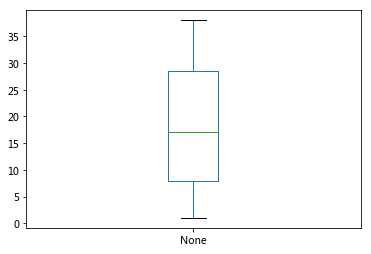

In [11]:
temp.plot(kind= 'box')

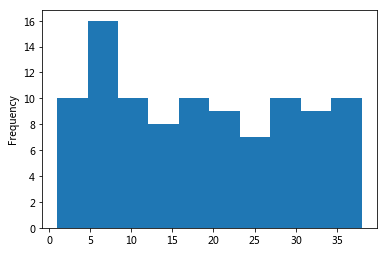

In [12]:
temp.plot(kind= 'hist')

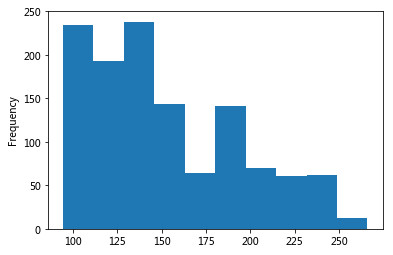

In [20]:
tw2330['Close'].plot(kind= 'hist')

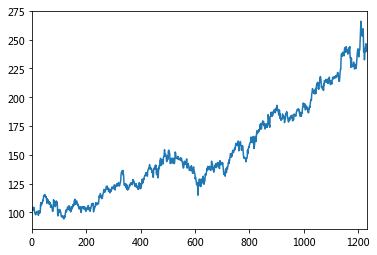

In [21]:
tw2330['Close'].plot(kind= 'line')

In [23]:
tw2330['ret'] = tw2330['Close'].pct_change(1)

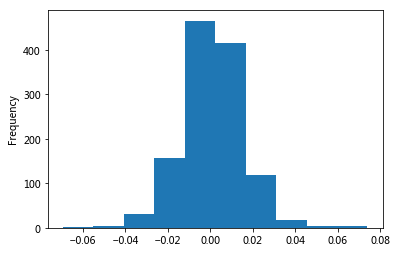

In [26]:
tw2330['ret'].plot(kind = 'hist')

### 求標準差與變異數

In [29]:
sd=tw2330['Close'].std()
sd

41.65404139499707

In [31]:
tw2330['Close'].var()
tw2330['Close'].std() * tw2330['Close'].std()

1735.0591645361296

In [32]:
tw2330['ret'].std()

0.014402010091068977

In [33]:
import pandas
tw2498 = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/2498.TW.csv')

In [37]:
tw2498 = tw2498[tw2498['Close'] != 'null' ]
tw2498['Close'] = tw2498['Close'].astype(float)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [38]:
tw2498['ret'] =  tw2498['Close'].pct_change(1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


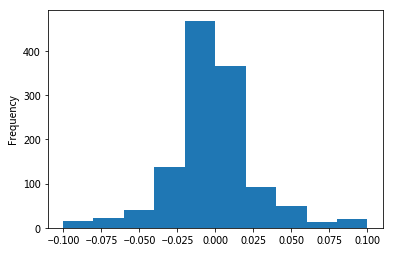

In [39]:
tw2498['ret'].plot(kind = 'hist')

In [40]:
tw2498['ret'].std()

0.028285450417411404

## 計算台積電與大盤相關程度

In [41]:
twii = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/TWII.csv',parse_dates={'Dates':[0]} )
tw2330 = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/tw2330.csv',parse_dates={'Dates':[0]})

In [45]:
m = pandas.merge(twii, tw2330, left_on = 'Dates', right_on = 'Dates')

In [47]:
m = m[['Dates','Close_x', 'Close_y']]
m.columns = ['Dates', 'TWII', 'TW2330']

In [56]:
m2 = m[ (m['TWII'] != 'null') & (m['TW2330'] != 'null') ]
m2['TWII'] = m2['TWII'].astype(float)
m2['TW2330'] = m2['TW2330'].astype(float)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [57]:
m2[['TWII', 'TW2330']].corr()

,TWII,TW2330
TWII,1.000000,0.857164
TW2330,0.857164,1.000000


## 點估計

In [64]:
#?pandas.read_csv
tw2330 = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/tw2330.csv',\
                         parse_dates={'Dates':[0]})
tw2330 = tw2330[tw2330['Close'] != 'null']
tw2330['Close'] =tw2330['Close'].astype(float) 
tw2330.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1218 entries, 0 to 1231
Data columns (total 7 columns):
Dates        1218 non-null datetime64[ns]
Open         1218 non-null object
High         1218 non-null object
Low          1218 non-null object
Close        1218 non-null float64
Adj Close    1218 non-null object
Volume       1218 non-null object
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 76.1+ KB


In [65]:
tw2330['DailyReturn'] = tw2330['Close'].pct_change(1)

In [67]:
import numpy as np
np.random.seed(10)
sample_size=100

sample=np.random.choice(a=tw2330['DailyReturn'],size=sample_size)
sample_mean=sample.mean()

In [68]:
sample_mean

0.0021348232677629642

In [73]:
from scipy import stats
z_critical=stats.norm.ppf(q=0.975)

In [74]:
z_critical

1.959963984540054

In [72]:
from scipy import stats
z_critical=stats.norm.ppf(q=0.025)
z_critical

-1.9599639845400545

In [75]:
pop_stdev=tw2330['DailyReturn'].std()
margin_of_error=z_critical*(pop_stdev/math.sqrt(sample_size))

In [79]:
(sample_mean - margin_of_error, sample_mean + margin_of_error)

(-0.0006879188405847976, 0.0049575653761107265)

## Student's t-test

In [80]:
from scipy import stats 
one_sample_data=[15.48,4.4,5.81,6.07,5.19,3.25,4.41,5.05,11.63,8.99]
one_sample=stats.ttest_1samp(one_sample_data,8)
print(one_sample[1]/2)

0.2232517794395264



## 迴歸分析

In [81]:
import pandas
df=pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/salary.csv',index_col=0)
df.head()

,year,salary
1,2.4,6600
2,5.5,10100
3,3.3,7300
4,0.2,5000
5,1.5,6100


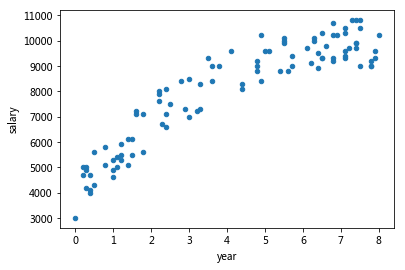

In [84]:
df.plot(x = 'year', y = 'salary',kind= 'scatter')

In [86]:
from sklearn.linear_model import LinearRegression

X = df[['year']]
Y = df[['salary']].values

regr=LinearRegression()
regr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [92]:
print('Coefficients:',regr.coef_)
print('Intercept:',regr.intercept_)

Coefficients: [[712.59413615]]
Intercept: [5049.00989981]


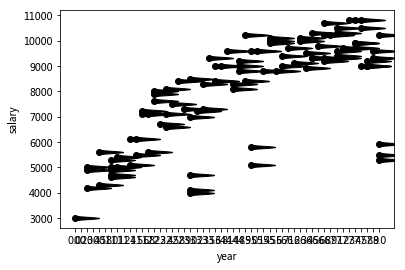

In [91]:
from matplotlib import pyplot as plt
X = df[['year']]
Y = df['salary'].values
plt.scatter(X, Y, color='black')
plt.xlabel('year')
plt.ylabel('salary')
#plt.figure([20,10])
plt.show()

In [93]:
regr.predict(5)

array([[8611.98058054]])

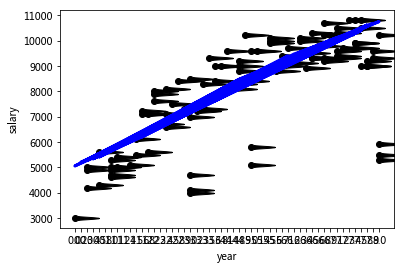

In [95]:
X = df[['year']]
Y = df['salary'].values
plt.scatter(X, Y, color='black')
plt.xlabel('year')
plt.ylabel('salary')
plt.plot(X,regr.predict(X),color='blue',linewidth=3)
plt.show()

In [106]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg=PolynomialFeatures(degree=2)
X_=poly_reg.fit_transform(X)
regr=LinearRegression()
regr.fit(X_,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [107]:
#regr.predict(X_)

In [111]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_reg = PolynomialFeatures(degree = 2)
X_ = poly_reg.fit_transform(X)

regr = LinearRegression()
regr.fit(X_,Y )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

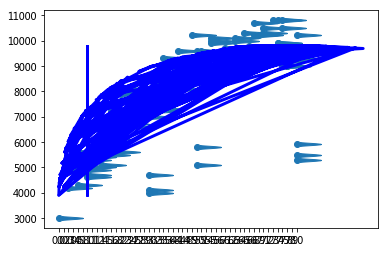

In [112]:
plt.scatter(X,Y)
plt.plot(X_, regr.predict(X_), color = 'blue', linewidth = 3)
plt.show()

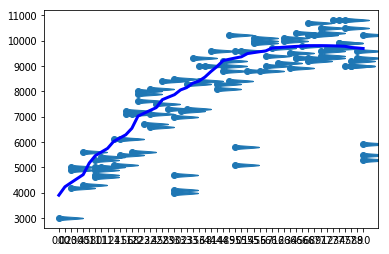

In [113]:
X2  = X.sort_values('year')
X2_ = poly_reg.fit_transform(X2)

plt.scatter(X,Y)
plt.plot(X2, regr.predict(X2_), color = 'blue', linewidth = 3)
plt.show()

## 建立多元迴歸模型

In [128]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/house-prices.csv')
df.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 8 columns):
Home            128 non-null int64
Price           128 non-null int64
SqFt            128 non-null int64
Bedrooms        128 non-null int64
Bathrooms       128 non-null int64
Offers          128 non-null int64
Brick           128 non-null object
Neighborhood    128 non-null object
dtypes: int64(6), object(2)
memory usage: 8.1+ KB


In [130]:
pandas.get_dummies(df['Brick']).head()

,No,Yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [131]:
pandas.get_dummies(df['Neighborhood']).head()

,East,North,West
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [132]:
house = pandas.concat([df,pandas.get_dummies(df['Brick']), pandas.get_dummies(df['Neighborhood'])], axis  = 1)

In [126]:
house.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood,No,Yes,East,North,West
0,1,114300,1790,2,2,2,No,East,1,0,1,0,0
1,2,114200,2030,4,2,3,No,East,1,0,1,0,0
2,3,114800,1740,3,2,1,No,East,1,0,1,0,0
3,4,94700,1980,3,2,3,No,East,1,0,1,0,0
4,5,119800,2130,3,3,3,No,East,1,0,1,0,0


In [133]:
del house['Brick']
del house['Neighborhood']
del house['No']
del house['West']
del house['Home']

In [136]:
house.head()

,Price,SqFt,Bedrooms,Bathrooms,Offers,Yes,East,North
0,114300,1790,2,2,2,0,1,0
1,114200,2030,4,2,3,0,1,0
2,114800,1740,3,2,1,0,1,0
3,94700,1980,3,2,3,0,1,0
4,119800,2130,3,3,3,0,1,0


In [137]:
house.columns

Index(['Price', 'SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Yes', 'East',
       'North'],
      dtype='object')

In [139]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
X = house[['SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Yes', 'East','North']]
y = house['Price'].values

In [140]:
regr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [142]:
#regr.predict(X)

In [143]:
import statsmodels.api as sm

X2=sm.add_constant(X)
est=sm.OLS(y,X2)
est2=est.fit()

print(est2.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     113.3
Date:                Sat, 03 Mar 2018   Prob (F-statistic):           8.25e-50
Time:                        16:31:57   Log-Likelihood:                -1356.7
No. Observations:                 128   AIC:                             2729.
Df Residuals:                     120   BIC:                             2752.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.284e+04   1.02e+04      2.231      0.0

In [156]:
est2.aic

2729.3189814012494

## 使用AIC 篩選模型

In [153]:
#house.columns
predictorcols = ['SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Yes', 'East', 'North']

import itertools
len(predictorcols)
#list(itertools.combinations(predictorcols,4))

7

In [163]:
AICs={}
for i in range(1,len(predictorcols) + 1):
    for variables in itertools.combinations(predictorcols,i):
        predictors=X[list(variables)]
        predictors2=sm.add_constant(predictors)
        est=sm.OLS(y,predictors2)
        res=est.fit()
        AICs[variables] = res.aic
        
    #print(list(itertools.combinations(predictorcols,i)))

In [168]:
from collections import Counter
c = Counter(AICs)
c.most_common()[::-1][0:5]

[(('SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Yes', 'East', 'North'),
  2729.3189814012494),
 (('SqFt', 'Bathrooms', 'Offers', 'Yes', 'East', 'North'), 2734.639925628371),
 (('SqFt', 'Bedrooms', 'Offers', 'Yes', 'East', 'North'), 2741.3156609981506),
 (('SqFt', 'Offers', 'Yes', 'East', 'North'), 2748.8490492259953),
 (('SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Yes', 'East'),
  2766.624649944451)]

## 591 房屋租金預測

In [198]:
import pandas
house = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/rent_591_sample.csv', index_col = 0)
house.head(3)

,id,address,floor,allfloor,layout,area,price,browsenum_all
0,6032971,永康街47巷永康街五樓頂加..,5,5,5房3廳3衛,46.8,"60,000",751
1,6054083,仁愛路四段仁愛路樹海景觀..,7,12,4房2廳2衛,76.9,"100,000",162
2,5957980,光復南路高樓層大巨蛋正對..,10,13,4房2廳2衛,71.3,"150,000",2385


In [199]:
house['price'] = house['price'].map(lambda e: int(str(e).replace(',','')))

In [200]:
house[['bedroom', 'livingroom', 'bathroom']] = house['layout'].str.extract('(\d+)房(\d+)廳(\d+)衛')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


In [201]:
house = house[['price', 'area', 'bathroom', 'livingroom', 'bedroom', 'floor', 'allfloor']]

In [202]:
house['bathroom'] = house['bathroom'].astype(float)
house['livingroom'] = house['livingroom'].astype(float)
house['bedroom'] = house['bedroom'].astype(float)

In [204]:
house.dropna(inplace=True)

In [205]:
X = house[['area', 'bathroom', 'livingroom', 'bedroom', 'floor', 'allfloor']]
y = house['price']

In [207]:
import statsmodels.api as sm

X2=sm.add_constant(X)
est=sm.OLS(y,X2)
est2=est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     262.1
Date:                Sat, 03 Mar 2018   Prob (F-statistic):          8.83e-176
Time:                        17:11:30   Log-Likelihood:                -8097.7
No. Observations:                 712   AIC:                         1.621e+04
Df Residuals:                     705   BIC:                         1.624e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5846.5997   3721.958      1.571      0.1

In [208]:
house.columns

Index(['price', 'area', 'bathroom', 'livingroom', 'bedroom', 'floor',
       'allfloor'],
      dtype='object')

In [209]:
predictorcols = ['area', 'bathroom', 'livingroom', 'bedroom', 'floor','allfloor']


In [210]:
AICs={}
for i in range(1,len(predictorcols) + 1):
    for variables in itertools.combinations(predictorcols,i):
        predictors=X[list(variables)]
        predictors2=sm.add_constant(predictors)
        est=sm.OLS(y,predictors2)
        res=est.fit()
        AICs[variables] = res.aic

In [211]:
from collections import Counter
c = Counter(AICs)
c.most_common()[::-1][0:5]

[(('area', 'bathroom', 'bedroom', 'floor'), 16205.695391186993),
 (('area', 'bathroom', 'bedroom', 'floor', 'allfloor'), 16207.590221620825),
 (('area', 'bathroom', 'livingroom', 'bedroom', 'floor'), 16207.593620755726),
 (('area', 'bathroom', 'livingroom', 'bedroom', 'floor', 'allfloor'),
  16209.49672391596),
 (('area', 'bedroom', 'floor'), 16221.25220004545)]

In [212]:
X = house[['area', 'bathroom', 'bedroom', 'floor']]
y = house['price']

In [213]:
import statsmodels.api as sm

X2=sm.add_constant(X)
est=sm.OLS(y,X2)
est2=est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     394.1
Date:                Sat, 03 Mar 2018   Prob (F-statistic):          2.47e-178
Time:                        17:14:06   Log-Likelihood:                -8097.8
No. Observations:                 712   AIC:                         1.621e+04
Df Residuals:                     707   BIC:                         1.623e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7071.2324   2462.755      2.871      0.0